# <center>Mundo Interconectado: Festival de Eurovisión</center>

<center> Sofía Maceín Sanz </center>

<center> Araceli Pérez Buendía </center>

# Índice

1. [Introducción](#introduccion)
2. [Resumen y objetivos](#resumen-y-objetivos)
3. [Análisis exploratorio de los datos](#analisis-exploratorio-de-los-datos)
4. [Análisis del grafo](#analisis-del-grafo)
   * [Métricas de la red](#metricas-de-la-red)
   * [Análisis de comunidades](#analisis-de-comunidades)
   * [Evolución y dinámica](#evolucion-y-dinamica)
5. [Conclusiones](#conclusiones)

[Bibliografía](#bibliografia)

## 1. Introducción <a name="introduccion"></a>

El Festival de Eurovisión es una competición internacional de canciones organizada por la Unión Europea de Radiodifusión (UER), en la que participan países de toda Europa y, en ocasiones, de otras partes del mundo. Cada país envía una canción para competir, y los espectadores votan por sus favoritas a través de un sistema de puntos. La canción ganadora se decide mediante una combinación de votos de un jurado profesional y del público.  

El formato del concurso consta de tres programas en vivo: la Primera Semifinal, la Segunda Semifinal y la Gran Final. Los diferentes países compiten primero por un pase a la final donde se unen a las emisoras conocidas como los "Cinco Grandes" y a la Emisora Anfitriona (generalmente el país que ganó el año anterior). Los "Cinco Grandes" son: Francia, Alemania, Italia, España y Reino Unido. Se trata del grupo de países que realizan la mayor contribución financiera para la organización del concurso. 

Algunos puntos clave del concurso son:
* El evento se lleva a cabo anualmente desde 1956.
* Cada país debe llevar un artista o banda que lo represente cada año.
* El sistema de votación se divide en dos partes: los votos del jurado, conformado por expertos de la industria musical, y más recientemente, el televoto, que brinda al público la oportunidad de votar por su favorito a través de SMS, teléfono o la aplicación de Eurovisión.
* Un país (ya sea jurado o público) no puede votarse a sí mismo.
* Cada país vota por 12 de los 41 participantes. La primera opción recibe 12 puntos y la última recibe 1 punto.
* Sólo se anuncian los tres primeros puestos en la final.

La finalidad principal de Eurovisión es promover la música, la diversidad cultural y el entendimiento internacional a través de un evento de entretenimiento televisado a nivel mundial. Además, se considera como una oportunidad para fortalecer los lazos entre los países europeos, celebrando la diversidad y la unidad en un contexto de competición amistosa.

## 2.  Resumen y objetivos <a name="resumen-y-objetivos"></a>

En este estudio, se procede a realizar un análisis del concurso de Eurovisión utilizando técnicas de análisis de redes. Para ello, se emplea un conjunto de datos de acceso libre que incluye metadatos, clasificaciones del concurso y datos de votación de 1735 canciones que han participado en el Festival de la Canción de Eurovisión. Se prevé que la próxima versión de este conjunto de datos también incluya características de audio. Los metadatos y los datos de votación son proporcionados por el sitio web de fans de EurovisionWorld. En particular, la base de datos empleada se ha obtenido de Kaggle, donde se recopilan las votaciones del concurso en sus tres fases, tanto del jurado como del televoto, desde 1975 hasta 2019.

El objetivo principal es comprobar si existe algún tipo de sesgo en las votaciones. Para ello, se estudiará si las votaciones están influenciadas por afinidades culturales, la ubicación geográfica de los países o posibles acontecimientos políticos significativos.

## 3. Análisis exploratorio de los datos <a name="analisis-exploratorio-de-los-datos"></a>

Para iniciar el estudio, primero se procede a limpiar la base de datos con el fin de comprender la organización de los datos, identificar posibles valores atípicos y obtener una intuición inicial para el análisis posterior del grafo subyacente de la red. 

###  Paquetes y librerías

In [1]:
# Paquetes y librerias
import numpy as np 
import pandas as pd 
import pylab as plt
import seaborn as sns
import pprint
from IPython.display import HTML

%matplotlib inline
sns.set_style('whitegrid')

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Carga de los datos 

En primer lugar, cargamos los datos y miramos la dimensión y la estructura.

In [3]:
# Dataset de eurovision
df = pd.read_excel('eurovision_1975_2019.xlsx')
df.columns = ['year','final','edition','votetype','countryfrom','countryto','points','duplicate'];

# Visualizacion dataset
df.sample(5)

year final  edition votetype      countryfrom       countryto  points  \
2469   1981     f    1981f        J  The Netherlands  United Kingdom      12   
27076  2011     f    2011f        J          Hungary         Estonia       0   
27892  2011   sf1  2011sf1        J            Malta         Georgia       8   
26958  2011     f    2011f        J          Finland         Iceland       8   
19214  2007     f    2007f        J          Belgium         Moldova       0   

      duplicate  
2469        NaN  
27076       NaN  
27892       NaN  
26958       NaN  
19214       NaN

In [4]:
# Dimension de los datos
df.shape

(49832, 8)

Existen 49832 registros de 8 variables.

In [5]:
# Valores de las columnas
for col in df.columns:
    print(col, ': ', sorted(df[col].dropna().unique()), '\n')

year :  [1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019] 

final :  ['f', 'sf', 'sf1', 'sf2'] 

edition :  ['1975f', '1976f', '1977f', '1978f', '1979f', '1980f', '1981f', '1982f', '1983f', '1984f', '1985f', '1986f', '1987f', '1988f', '1989f', '1990f', '1991f', '1992f', '1993f', '1994f', '1995f', '1996f', '1997f', '1998f', '1999f', '2000f', '2001f', '2002f', '2003f', '2004f', '2004sf', '2005f', '2005sf', '2006f', '2006sf', '2007f', '2007sf', '2008f', '2008sf1', '2008sf2', '2009f', '2009sf1', '2009sf2', '2010f', '2010sf1', '2010sf2', '2011f', '2011sf1', '2011sf2', '2012f', '2012sf1', '2012sf2', '2013f', '2013sf1', '2013sf2', '2014f', '2014sf1', '2014sf2', '2015f', '2015sf1', '2015sf2', '2016f', '2016sf1', '2016sf2', '2017f', '2017sf1', '2017sf2', '2018f', '2018sf1', '20

In [6]:
df.sample(5)

year final  edition votetype countryfrom countryto  points duplicate
33389  2014   sf2  2014sf2        J      Greece  Slovenia       0       NaN
25074  2010     f    2010f        J     Belarus   Moldova       4       NaN
40264  2017     f    2017f        T     Estonia   Austria       0       NaN
27853  2011   sf1  2011sf1        J     Iceland   Finland      12       NaN
44182  2018     f    2018f        T     Hungary   Moldova       2       NaN

Las variables del dataset son las siguientes:

*   **`year`** : Representa el año en que se celebró el concurso. Los valores varían desde 1975 hasta 2019.
*   **`final`** : Indica si el registro corresponde a la final o a una de las semifinales del concurso.
*   **`edition`** : Representa la edición específica del evento de Eurovisión, indicada por el año y el tipo de ronda (final o semifinal).
*   **`votetype`** : Indica el tipo de voto utilizado en el evento, donde "J" representa el voto del jurado y "T" representa el televoto.
*   **`countryfrom`** : Indica el país de origen del voto.
*   **`countryto`** : Indica el país al que se dirige el voto.
*   **`points`** : Representa la cantidad de puntos asignados por un país a otro durante el proceso de votación. Los valores pueden variar de 0 y 8, 10 y 12.
*   **`duplicate`** : Esta variable marca con "x" aquellas filas donde el país de origen y el país de destino son iguales.

Vemos el tipo de variables y si existen valores nulos.

In [7]:
# Tipo de variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49832 entries, 0 to 49831
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         49832 non-null  int64 
 1   final        49832 non-null  object
 2   edition      49832 non-null  object
 3   votetype     49832 non-null  object
 4   countryfrom  49832 non-null  object
 5   countryto    49832 non-null  object
 6   points       49832 non-null  int64 
 7   duplicate    1528 non-null   object
dtypes: int64(2), object(6)
memory usage: 3.0+ MB


A continuación,

* Eliminamos del dataset los países que no están conectados dado un año, es decir, aquellos con puntuación `points` $ = 0$.
* Eliminamos las entradas marcadas como duplicadas, `duplicates` = 'x', que corresponenden a la unión del país consigo mismo.
* Renombramos algunos países para mayor facilidad
* Como para la construcción de la red final se tendrá en cuenta las ediciones a partir del año 2000, debido la incorporacion del televoto y la estabilidad política de los países, vamos a considerar los votos de Yugoslavia en sus correspondendientes estados actuales tras la disolución en 1992 (Bosnia y Herzegovina, Croacia, Eslovenia, Macedonia del Norte, Montenegro, Serbia, Kosovo).
* Eliminamos aquellos países con una baja participación, en particular, menor a 5 años o que no haya participado en los úlitmos 8 años.

Para todo esto, definimos una función `basicClean` en la que aplicamos los procedimientos explicados.

In [8]:
def basicClean(df, minYears = 5, last_participation = 8):

    # 1. ELiminamos puntuaciones de 0
    df2 = df.copy().query('points > 0')

    # 2. Eliminamos duplicados
    # Convertimos los valores 'x' a True y el resto a False
    df2['duplicate'] = df2['duplicate'].apply(lambda x: True if x == 'x' or x == True else False)
    # Nos quedamos con las filas en las que duplicate toma el valor False
    df2 = df2.query('duplicate == False').drop(columns=['duplicate'])


    # 3. Renombramos paises
    def applyRename(x):
        # Creamos un diccionario con los paises a renombrar
        renamings = {
            'North Macedonia': 'Macedonia',
            'F.Y.R. Macedonia': 'Macedonia',
            'The Netherands': 'Netherlands', # debido a un error en los datos
            'The Netherlands': 'Netherlands',
            'Bosnia & Herzegovina': 'Bosnia'}
        # Si el pais esta entre los paises del diccionario, cambiamos el nombre;
        # en caso contrario se devuelve el mismo nombre
        return renamings[x] if x in renamings else x

    # Aplicamos la funcion a las columnas con ls paises
    df2['countryfrom'] = df2['countryfrom'].apply(applyRename)
    df2['countryto']   = df2['countryto'].apply(applyRename)


    # 4. Division de Yugoslavia y Serbia & Montenegro a sus estados en la actualidad
    division = {
        'Yugoslavia': ['Macedonia', 'Serbia', 'Montenegro', 'Slovenia', 'Bosnia','Croatia'],
        'Serbia & Montenegro': ['Serbia', 'Montenegro']}

    df2['countryfrom'] = df2['countryfrom'].apply(lambda x:division[x] if x in division else x)
    df2['countryto']   = df2['countryto'].apply(lambda x:division[x] if x in division else x)

    df2 = df2.explode('countryfrom').explode('countryto')
    # Cada cambio que involucre a varios paises se desglosa entre los
    # pares de paises correspondientess


    # 5. Eliminamos aquellos paises que hayan participado menos 5 veces
    # y que no han estado activos en los ultimos 5 años

    # Calculamos numero de años participados y cuantos años han pasado desde
    # utlima participacion
    toKeep = df2.groupby('countryfrom').apply(lambda x:pd.Series(
        {'years': x['year'].nunique(),
        'last_participation': df2['year'].max() - x['year'].max()
    })).query(f'years >= {minYears} and last_participation <= {last_participation}').reset_index()['countryfrom']
    # Asi obtenemos la lista de paises que cumplen los requisitos

    # Mostramos los paises que no cumplen los requisitos
    display(HTML("<p>ignored countries: %s</p>" %', '.join(df2[df2['countryfrom'].isin(toKeep)==False]['countryfrom'].unique())))

    df2 = df2[df2['countryfrom'].isin(toKeep)]
    df2 = df2[df2['countryto'].isin(toKeep)]



    # 6. Tomamos los puntos unicamente de la final
    df2['finalcode'] = df2.final.map({'f':1, 'sf':2,'sf1':2,'sf2':2})
    temp1 = df2.groupby(['countryto','year']).agg({'finalcode':'min'});
    df2 = pd.merge(df2,temp1, on=['countryto','year','finalcode'], how='inner')

    assert len(df2.groupby(['countryfrom','countryto','year']).agg({'final':'nunique'}).query('final >1')) == 0

    df2.drop(columns=['finalcode','edition'], inplace=True)

    return df2.reindex()

In [11]:
# Aplicamos la funcion al dataset original
df2 = basicClean(df)

# Dimnesion del nuevo dataset
print('Dimension del nuevo dataset: ', df2.shape, '\n')

# Visualizacion del dataset
df2.sample(5)

Dimension del nuevo dataset:  (17199, 6) 



year final votetype countryfrom countryto  points
4852   1994     f        J    Slovakia   Croatia      12
9310   2008     f        J      Cyprus   Georgia       7
2462   1986     f        J     Germany   Finland       3
9422   2008     f        J       Malta   Iceland       6
16153  2018   sf1        T      Cyprus    Greece      12

Ahora tenemos un dataset con 17199 registros y 6 variables.

### Exploración 

El objetivo de esta sección es estudiar la posible distribución subyecente de los datos, así como posibles outliers o valores atípicos. Con ello, pretendemos crear una red que recoja la información básica del concurso a lo largo de los años para dar respuesta a las preguntas planteadas.

In [12]:
# Dataset
df2.sample(5)

year final votetype     countryfrom    countryto  points
13642  2016     f        J        Slovenia      Ukraine      12
12247  2014     f        J  United Kingdom        Spain       5
6629   2002     f        J          Latvia  Switzerland       1
1552   1983     f        J  United Kingdom      Finland       6
7254   2004     f        J         Iceland      Ukraine      12

**1) Tendencia en la participación a lo largo de los años:** Se muestra el número total de puntos otorgados a lo largo de los años en la categoría final de Eurovisión, proporcionando una perspectiva del crecimiento del evento y el interés continuo de los países.

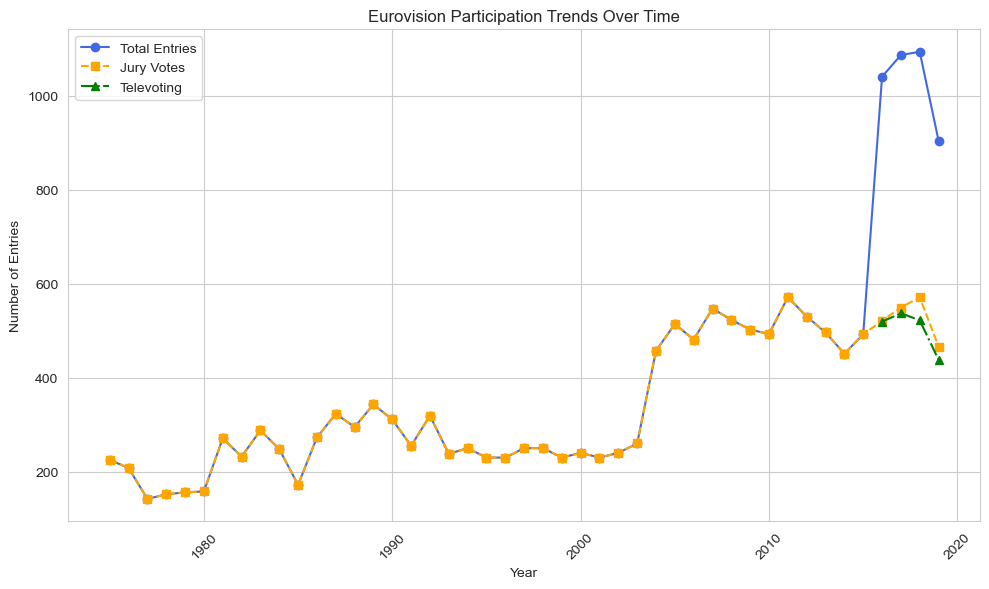

In [13]:
# Convertimos la columna 'year' a formato datetime
df2['year'] = pd.to_datetime(df2['year'], format='%Y')

# Agrupamos por año y contamos el número de entradas
participation_counts_total = df2.groupby(df2['year'].dt.year).size() # totales
participation_counts_J = df2[df2['votetype'] == 'J'].groupby(df2['year'].dt.year).size() # jurado
participation_counts_T = df2[df2['votetype'] == 'T'].groupby(df2['year'].dt.year).size() # televoto

# Grafico de las tendencias de participación
plt.figure(figsize=(10, 6))

participation_counts_total.plot(marker='o', color='royalblue', linestyle='-', label='Total Entries')
participation_counts_J.plot(marker='s', color='orange', linestyle='--', label='Jury Votes')
participation_counts_T.plot(marker='^', color='green', linestyle='-.', label='Televoting')

plt.title('Eurovision Participation Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Breve explicación del aumento de votos:

* 1997-2008: Televoto
* 2009-2015: Sistema Mixto
* 2016 - Televoto(app)

Se puede observar cómo el fenómeno del concurso ha ido creciendo a lo largo de los años. Cabe destacar un salto en el año 2016, cuando se introdujo la aplicación oficial de Eurovisión. Esta innovación permitió a los espectadores votar por sus canciones favoritas durante las semifinales y la gran final utilizando sus teléfonos móviles.

**2) Distribución de puntos por país:** Histograma que visualiza la distribución de puntos recibidos por cada país. Esto puede proporcionar información sobre la equidad y consistencia del proceso de votación.

<Figure size 1200x800 with 0 Axes>

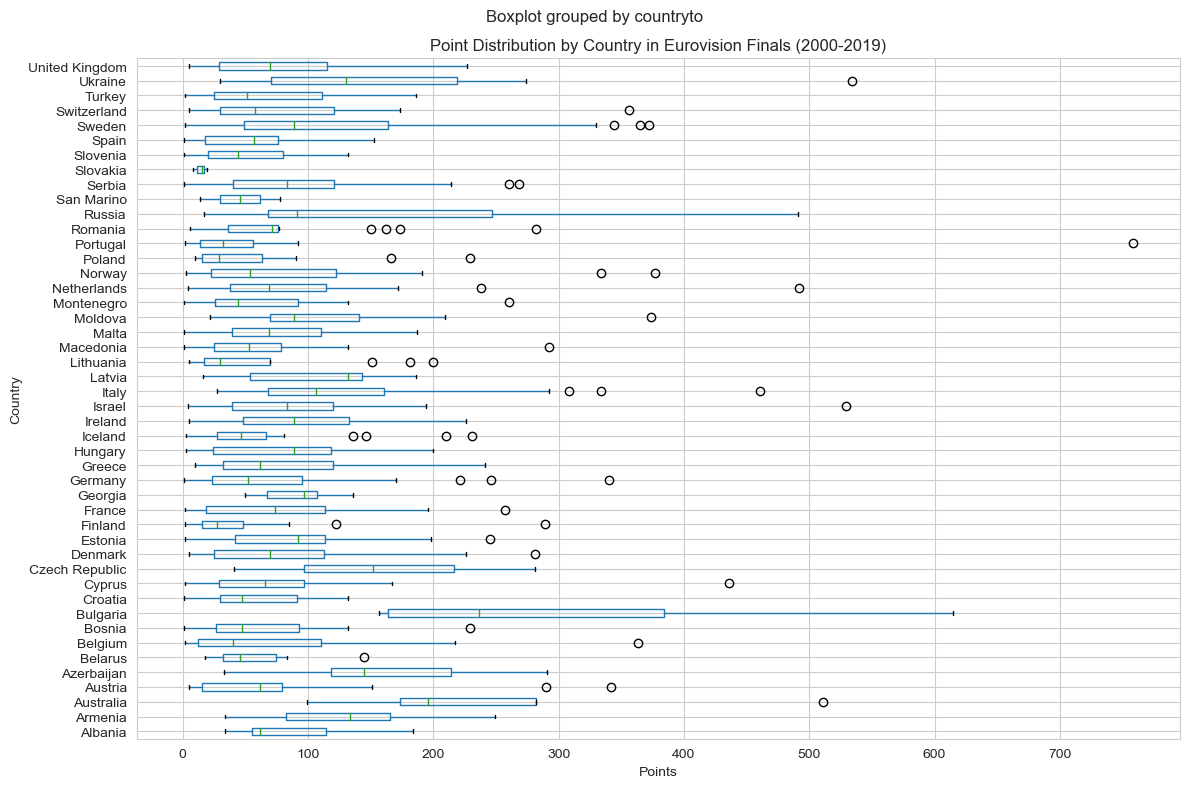

In [14]:
# Categoria de final (f)
df_final = df2[df2['final'] == 'f']
points_by_country_year = df_final.groupby(['countryto', df_final['year'].dt.year])['points'].sum().reset_index()

# Grafico boxplot
plt.figure(figsize=(12, 8))
boxplot = points_by_country_year.boxplot(column='points', by='countryto', vert=False, figsize=(12,8))

plt.title('Point Distribution by Country in Eurovision Finals (2000-2019)')
plt.xlabel('Points')
plt.ylabel('Country')
plt.grid(True)
plt.tight_layout()
plt.show()

En algunos países se observa una variabilidad considerable en la cantidad de puntos recibidos a lo largo de los años. Lo que significa que algunos años han sido más favoralbes en términos de puntuación recibida, y otros años menos favorables.

**3) Intercambio de puntos:** Identificar patrones de alianzas o amistades entre países, así como identificar grupos de países que con frecuencia se votan entre sí. Para lograrlo, se utiliza un mapa de calor que muestra el intercambio de puntos entre los países participantes.

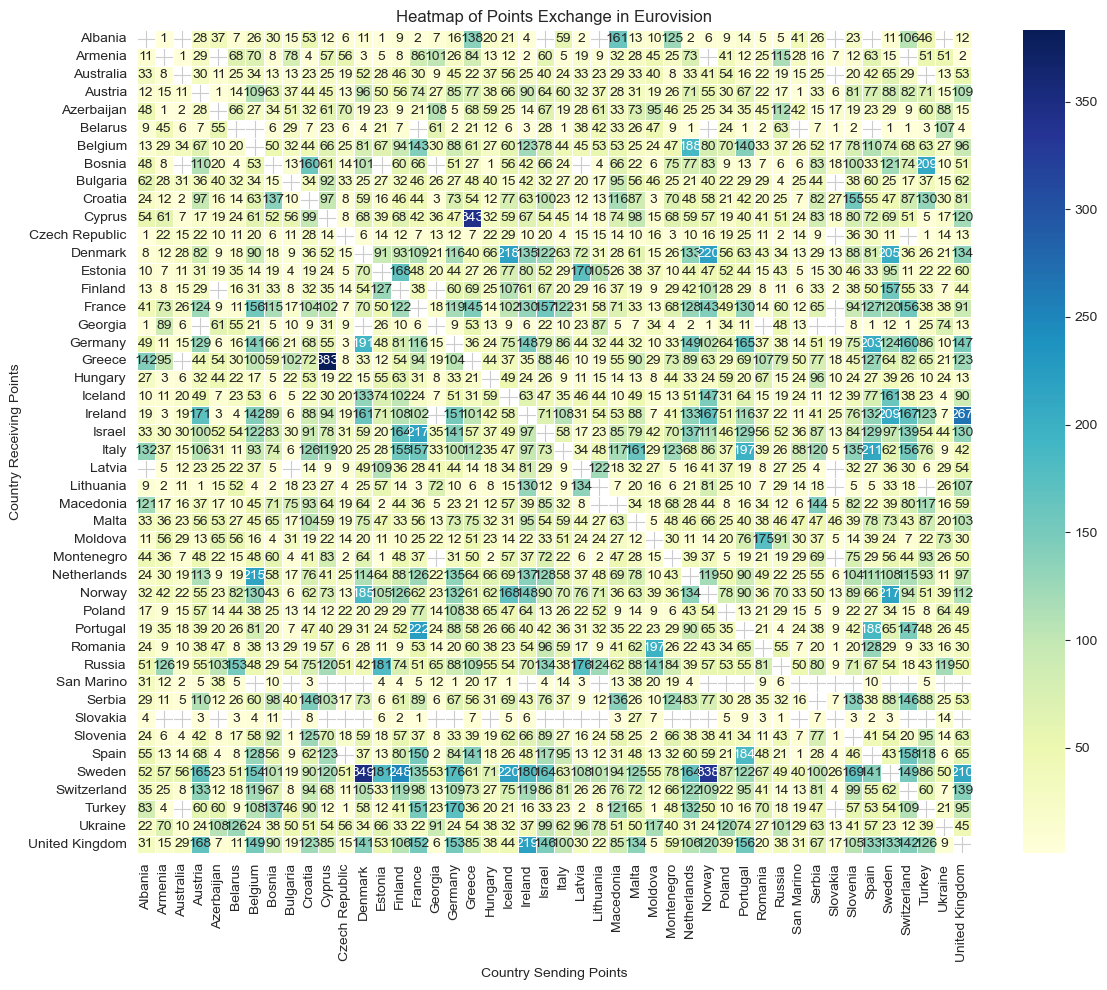

In [15]:
# Intercambio de puntos
points_matrix = df2.pivot_table(index='countryto', columns='countryfrom', values='points', aggfunc='sum')

# Grafico
plt.figure(figsize=(12, 10))
sns.heatmap(points_matrix, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Heatmap of Points Exchange in Eurovision')
plt.xlabel('Country Sending Points')
plt.ylabel('Country Receiving Points')
plt.tight_layout()
plt.show()

Se puede observar que países como Grecia y Chipre muestran una alta correlación en sus votaciones. Del mismo modo, existen otros bloques con una correlación significativa, como Suecia, Dinamarca y Noruega, y en menor medida Finlandia e Islandia; así como España y Portugal, o Irlanda y el Reino Unido. Por lo tanto, parece que la ubicación geográfica de los países y la afinidad cultural son factores influyentes en el intercambio de puntos entre ellos.

**4) Resumen de la participación por país en el concurso de Eurovisión**: incluyendo el número de años únicos en los que un país participó, el año más temprano de participación, el año más reciente de participación y el porcentaje de presencia, que representa la proporción de años en los que el país participó en relación con el número total de años disponibles.

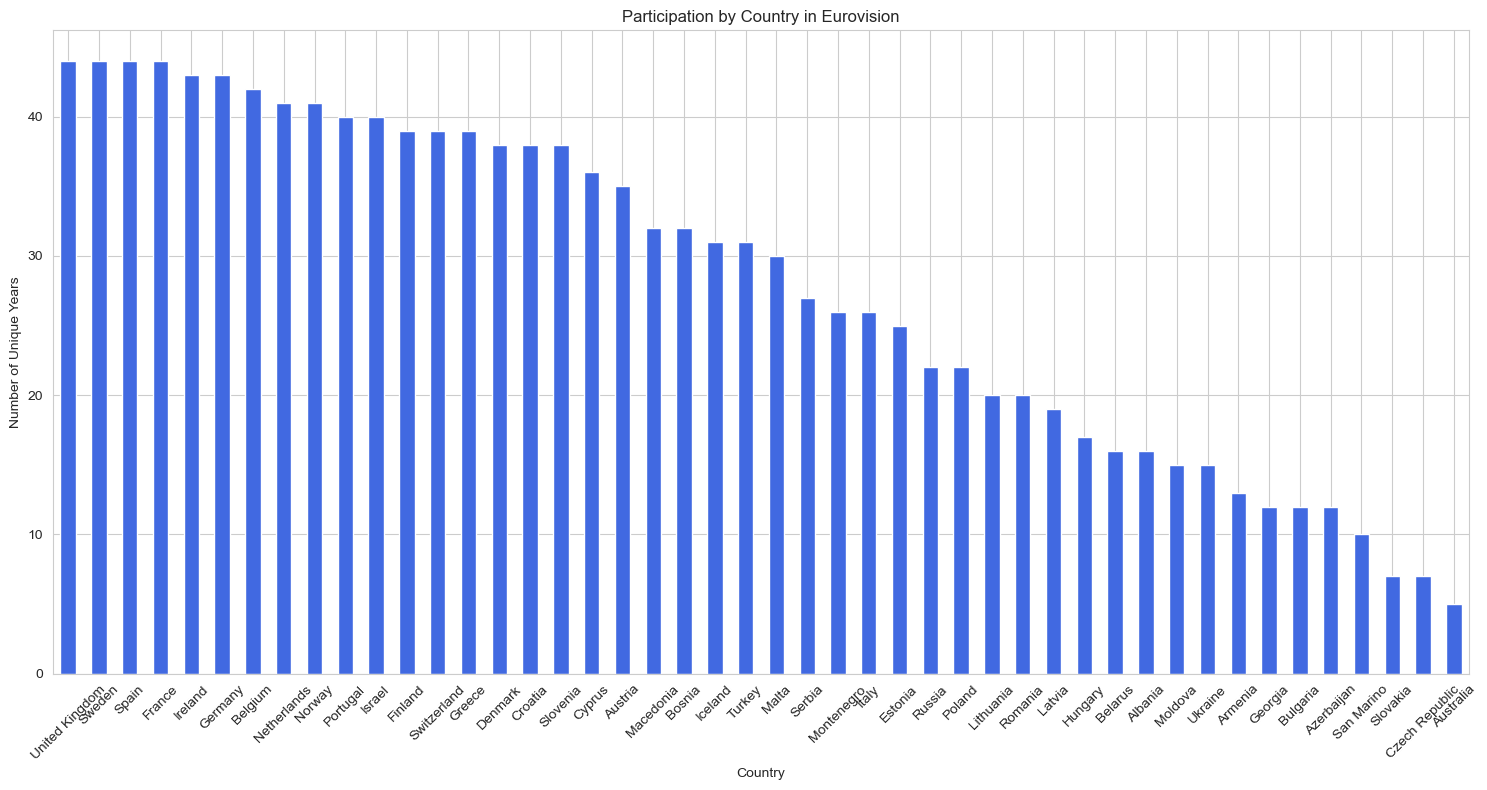

In [16]:
# Generate the summary of participation by country
participation_summary = df2.groupby(['countryto']).apply(lambda x: pd.Series({
    'nyear': x['year'].nunique(),
    'min_year': x['year'].min().year,
    'max_year': x['year'].max().year,
    'presence': int(100 * x['year'].nunique() / (x['year'].max().year - x['year'].min().year + 1))
}))

# Sort the summary by the number of unique years in descending order
participation_summary_sorted = participation_summary.sort_values('nyear', ascending=False)# Plot the participation by country as a bar chart
plt.figure(figsize=(15, 8))
participation_summary_sorted['nyear'].plot(kind='bar', color='royalblue')
plt.title('Participation by Country in Eurovision')
plt.xlabel('Country')
plt.ylabel('Number of Unique Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar que algunos países, como Reino Unido, Suecia, España y Francia, han participado en casi todas las ediciones del concurso desde que comenzó en 1975. Esto se debe a que forman parte de los "Cinco Grandes".

Otros países, como Australia, han participado en un número menor de ediciones debido a su incorporación más reciente al concurso. Sin embargo, su tasa de presencia es del 100% en las ediciones en las que han participado.

Algunos países han disminuido su participación a lo largo de los años, como Turquía, que dejó de participar después de 2012, y Bosnia, que dejó de participar después de 2016. Esto puede deberse a varias razones, como cambios en las políticas de participación o problemas financieros.

**Ganadores**

In [17]:
# Resumen top 3 de las finales
df2.query('final =="f"')\
    .groupby(['countryto','year']).agg({'points':'sum'}).reset_index()\
    .groupby('year').apply(lambda x:x.sort_values('points').tail(1)).reset_index(drop=True)\
    .sort_values('year',ascending=False)\
    .head(12).T.style.set_caption("The Winners")

Los países con las puntuaciones más altas en el Festival de Eurovisión en los últimos años han sido los Países Bajos, Israel, Portugal, Ucrania y Suecia

**Frecuencia con la que cada país aparece en la lista de los mejores países de Eurovisión en función de la cantidad de puntos recibidos en cada año y el número de posiciones superiores**

In [18]:
def atTop(df,tops):
    #points received
    df= df.groupby(['countryto','year']).agg({'points':'sum'}).reset_index().groupby('year')

    #top1 (country with most of points)
    top = df.apply(lambda x:x.sort_values('points').tail(1)).reset_index(drop=True)\
        .groupby('countryto').agg({'year':'nunique'}).rename(columns={'year':'years_on_top'}).reset_index()

    #the other tops
    for t in tops:
        temp = df.apply(lambda x:x.sort_values('points').tail(t)).reset_index(drop=True)\
            .groupby('countryto').agg({'year':'nunique'})\
            .rename(columns={'year':f'years_on_top_{t}'}).reset_index()
        top = pd.merge(top,temp, on='countryto',how='outer')

    top = top.fillna(0);
    floatcols = top.columns[top.dtypes == 'float64']
    top[floatcols] = top[floatcols].astype(int)

    return top

In [19]:
dfAtTop = atTop(df2.query('final =="f"'), tops=[3,5,7,10])
dfAtTop.sort_values(['years_on_top','years_on_top_3'], ascending=[False,False]).head(20)\
    .style.bar(subset=['years_on_top','years_on_top_3','years_on_top_5','years_on_top_7','years_on_top_10'],
               color='#cccccc')

Vemos que países como Suecia, Irlanda, Noruega y Dinamarca tienen una presencia notable en las posiciones superiores, lo que sugiere un dominio continuo en el concurso de Eurovisión.

Países como Israel, Francia, Alemania y Ucrania muestran una presencia intermitente en las posiciones superiores, lo que indica un éxito variable a lo largo de los años.

La mayoría de los países tienen al menos una aparición en las posiciones superiores, lo que sugiere una distribución relativamente equitativa del éxito en Eurovisión entre varios países.

**5) Preferencias de voto de España hacia diferentes países en el Festival de Eurovisión, desglosadas por los diferentes tipos de votos**:
El jurado puede influir más en el resultado que el público (televoto) y, en muchos casos, es clara la diferencia en sus preferencias.

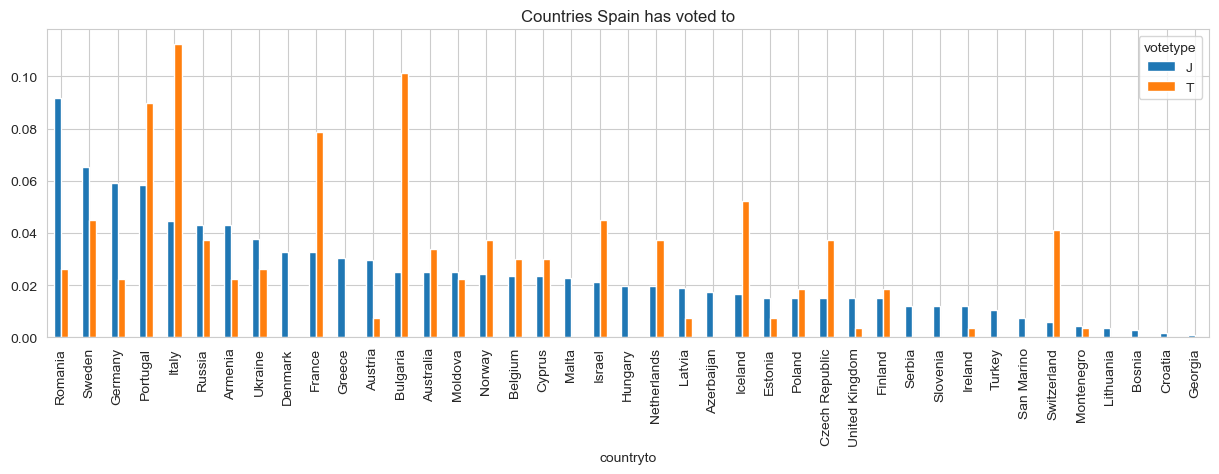

In [20]:
# Desglose de votaciones de España a partir del 2000
df2 \
    .query('year >= 2000 and countryfrom=="Spain"')\
    .pivot_table(index='countryto',columns='votetype', values='points',aggfunc='sum').fillna(0).sort_values('J',ascending=False)\
    .apply(lambda x: x/x.sum(), axis=0)\
    .plot(kind='bar',stacked=False,figsize=(15,4), title='Countries Spain has voted to');
plt.grid('off')
plt.show();

## 4. Análisis del grafo <a name="analisis-del-grafo"></a>

En esta sección, se plantea el estudio utilizando un modelo de grafos dirigidos. En este contexto, los nodos representan los diferentes países participantes en el concurso de Eurovisión, mientras que las aristas dirigidas representan las relaciones de votación entre estos países. Además, se asigna un peso a cada arista basado en las puntuaciones recibidas durante el concurso. Este enfoque nos permite explorar las relaciones de votación, identificar patrones de afinidad cultural y evaluar la influencia de diferentes factores en los resultados finales.

In [21]:
# Paquetes y Librerias
import networkx as nx

In [56]:
# Funciones de selecciones de porcentaje
def selectTopN(x, column, top=3):
    x = x.sort_values(column, ascending=False).head(top)
    return x

def selectTopPercent(x, column, percent=0.3, retrieve_first=True):
    x = x.sort_values(column, ascending=False)
    cut = x[column].cumsum() / x[column].sum()
    cut = cut <= percent

    # Return at least the first and avoid warnings
    if retrieve_first and cut.sum() == 0:
        return x.iloc[0]

    return x[cut]


Visualizamos el grafo resultante de la agregación de votos y televotos en la fase final del Festival de Eurovisión, organizado por año.

In [59]:
# Funcion para normalizar las puntuaciones
def normalizer(x):
    # Dividimos la puntuacion por la suma total de los puntos
    x['points'] = x['points']/x['points'].sum()
    return x

# Funcion para asignar las puntuaciones
def asignar_puntuaciones(df, ano):
    df_ano = df_19 = df2[df2['year'].dt.year == ano]\
    .query('final=="f"')\
    .groupby(['countryfrom','countryto'])\
    .agg({'points':'sum'}).reset_index()\
    .groupby('countryfrom').apply(normalizer).reset_index(drop=True)\
    .rename(columns={'points':'weight'})
    
    return df_ano

# Funcion para crear el grafo dirigido de un año 
def plot_eurovision_graph(df, year, percent=0.3):
    # Agregar el televoto y el voto del jurado
    df_year = asignar_puntuaciones(df, year)

    # Crear el grafo original con todas las conexiones
    G = nx.from_pandas_edgelist(df_year, 'countryfrom', 'countryto', ['weight'], create_using=nx.DiGraph)
    pos1 = nx.circular_layout(G) #layout del primer grafo

    # Crear el segundo grafo con el porcentaje de los pesos mas altos
    selected_edges = selectTopPercent(df_year, 'weight', percent=percent)
    G2 = nx.from_pandas_edgelist(selected_edges, 'countryfrom', 'countryto', ['weight'], create_using=nx.DiGraph)
    pos2 = nx.kamada_kawai_layout(G2, weight='weight') # layout del segundo grafo

    # Graficos
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    # Grafo original
    nx.draw(G, pos1, ax=axs[0], with_labels=True, node_color=list(nx.pagerank(G).values()),
            cmap=plt.cm.viridis_r, edge_color='#cccccc', font_color='#000', font_size=10, font_weight='bold', arrows=True)
    axs[0].set_title(f'Directed Graph of Points Exchange in Eurovision {year} (Original)')
    axs[0].axis('off')

    # Grafo con el porcentaje seleccionado
    nx.draw(G2, pos2, ax=axs[1], with_labels=True, node_color=list(nx.pagerank(G2).values()),
            cmap=plt.cm.viridis_r, edge_color='#cccccc', font_color='#000', font_size=10, font_weight='bold', arrows=True)
    axs[1].set_title(f'Directed Graph of Points Exchange in Eurovision {year} (30% of Edge Weight)')
    axs[1].axis('off')


    plt.tight_layout()
    plt.show()

    return df_year, selected_edges, G, G2

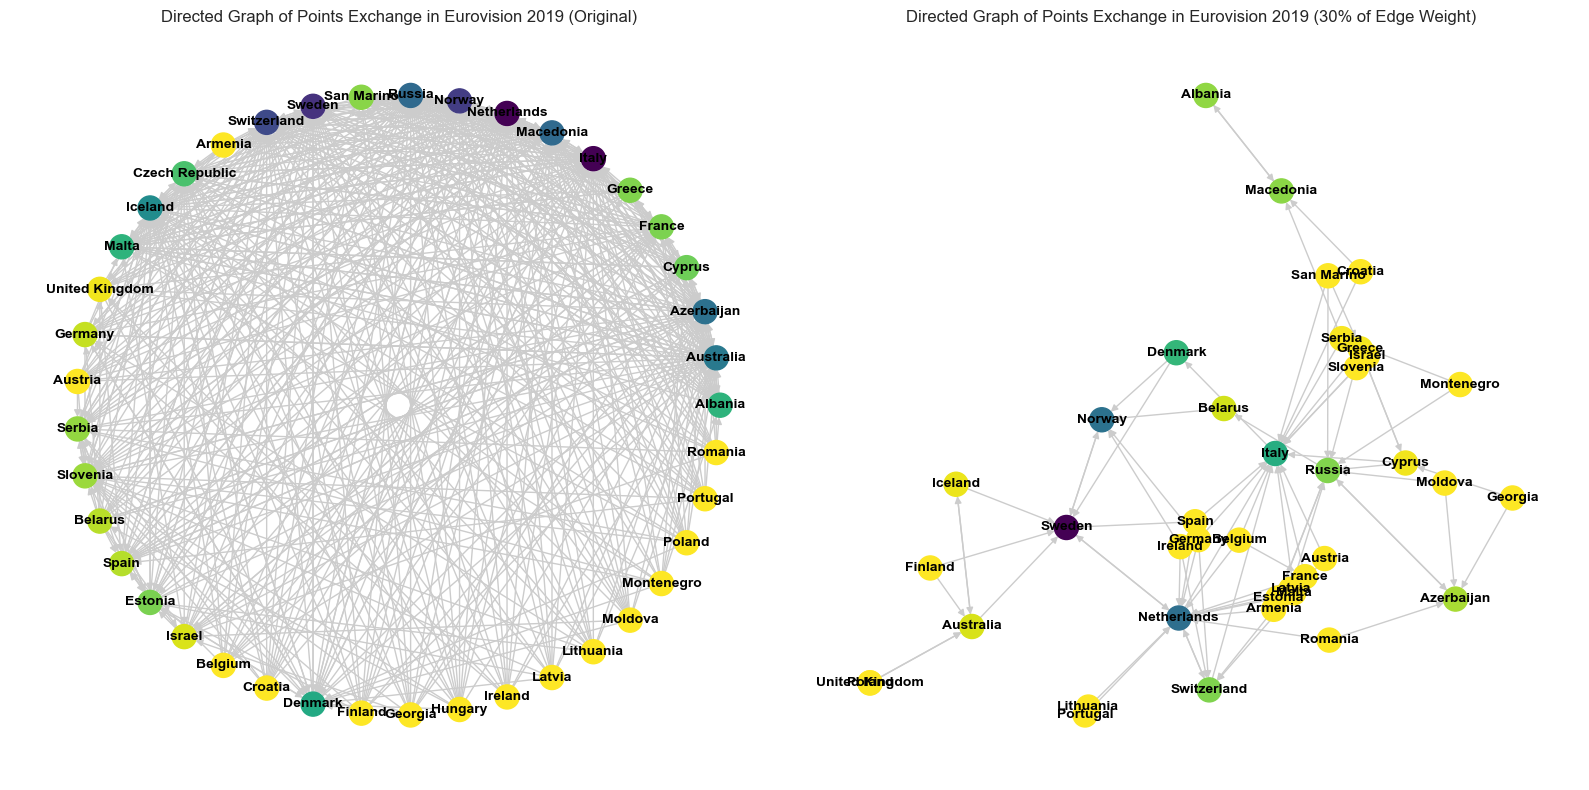

(        countryfrom    countryto    weight
 0           Albania    Australia  0.017544
 1           Albania   Azerbaijan  0.096491
 2           Albania       Cyprus  0.061404
 3           Albania       France  0.026316
 4           Albania       Greece  0.052632
 ..              ...          ...       ...
 531  United Kingdom       Norway  0.105263
 532  United Kingdom       Russia  0.035088
 533  United Kingdom        Spain  0.017544
 534  United Kingdom       Sweden  0.131579
 535  United Kingdom  Switzerland  0.105263
 
 [536 rows x 3 columns],
     countryfrom    countryto    weight
 466      Serbia    Macedonia  0.210526
 335       Malta        Italy  0.210526
 436      Russia   Azerbaijan  0.210526
 110      Cyprus       Greece  0.210526
 215      Greece       Cyprus  0.210526
 ..          ...          ...       ...
 112      Cyprus        Italy  0.140351
 437      Russia      Belarus  0.131579
 206     Germany  Netherlands  0.131579
 23      Armenia  Switzerland  0.131579
 151 

In [63]:
# Final 2019
plot_eurovision_graph(df2, 2019, percent=0.3)

In [64]:
# Final 2003
plot_eurovision_graph(df2, 2003, percent=0.3)

(        countryfrom    countryto    weight
 0           Austria      Belgium  0.068966
 1           Austria       Bosnia  0.120690
 2           Austria      Croatia  0.086207
 3           Austria      Germany  0.017241
 4           Austria       Norway  0.034483
 ..              ...          ...       ...
 255  United Kingdom  Netherlands  0.017241
 256  United Kingdom       Norway  0.103448
 257  United Kingdom       Poland  0.034483
 258  United Kingdom       Sweden  0.172414
 259  United Kingdom       Turkey  0.120690
 
 [260 rows x 3 columns],
         countryfrom    countryto    weight
 83           Greece       Cyprus  0.206897
 19          Belgium       Turkey  0.206897
 197          Russia      Romania  0.206897
 108         Ireland       Norway  0.206897
 116          Israel        Spain  0.206897
 42           Cyprus       Greece  0.206897
 29           Bosnia       Turkey  0.206897
 232          Turkey       Bosnia  0.206897
 188         Romania       Sweden  0.206897
 127 

### 4.1. Métricas de la red <a name="metricas-de-la-red"></a>

En primer lugar, se procede a analizar las diversas métricas de la red estática, es decir para un año en concreto, con el propósito de evaluar su capacidad para representar y explicar la realidad estructural. Esto permite examinar la relevancia de las interacciones entre los nodos, así como la información estructural que proporcionan. Además, se busca caracterizar la complejidad del modelo, considerando la completitud del mismo en la representación de las relaciones entre los elementos de la red.

In [95]:
# Funcion para calcular las metricas de una red dado un año
def metricas_red(df, ano):
    # Filtramos el año especifico
    df_ano, edges_ano, G_ano, Gedges_ano= plot_eurovision_graph(df2, ano, percent=0.3)
    
    # Metricas
    metrics = {}
    
    # Numero de nodos y enlaces
    metrics['nodos'] = G_ano.number_of_nodes()
    metrics['enlaces'] = G_ano.number_of_edges()
    
    # Densidad
    metrics['denisdad'] = nx.density(G_ano)
    
    # Grado 
    metrics['grado entrada'] = G_ano.in_degree() # conexiones que apuntan
    
    # Grafico distribucion de grado
    plt.figure(figsize=(8, 6))
    plt.hist(dict(G_ano.in_degree()).values())
    plt.title(f'Degree Distribution - Eurovision {ano}')
    plt.show()  
    
    # Page rank
    metrics['page_rank'] = nx.pagerank(G_ano, weight='weight', max_iter=1000),
    
    # Caminos en el grafo
    # Componente gigante
    largest_component = max(nx.strongly_connected_components(G_ano), key=len)
    metrics['G_largest'] = G_ano.subgraph(largest_component).copy()
    
    # Diametro
    metrics['diameter'] = nx.diameter(metrics['G_largest'])
    
    # Grafico de la componente gigante
    plt.figure(figsize=(8, 6))
    pos = nx.kamada_kawai_layout(metrics['G_largest'])  # You can choose any layout you prefer
    nx.draw(metrics['G_largest'], pos, with_labels=True, node_color='#87CEEB',
        edge_color='#cccccc', font_color='#000', font_size=10, font_weight='bold', arrows=True)
    plt.title(f'Largest Strongly Connected Component - Eurovision {ano}')
    plt.axis('off')
    plt.show()
    
    # Centralidad de intermediacion
    metrics['betweenness_centrality'] = nx.betweenness_centrality(G_ano)

    # Centralidad de cercania
    metrics['closeness_centrality'] = nx.closeness_centrality(G_ano)

    # Centralidad de grado
    metrics['degree_centrality'] = nx.degree_centrality(G_ano)

    # Transitividad
    metrics['transitivity'] = nx.transitivity(G_ano)

    # Longitud promedio del camino mas corto
    metrics['average_shortest_path_length'] = nx.average_shortest_path_length(metrics['G_largest'])

    # Coeficiente de clustering
    metrics['clustering_coefficient'] = nx.average_clustering(G_ano)
    
    return metrics  

**Métricas de la red para el año 2019**

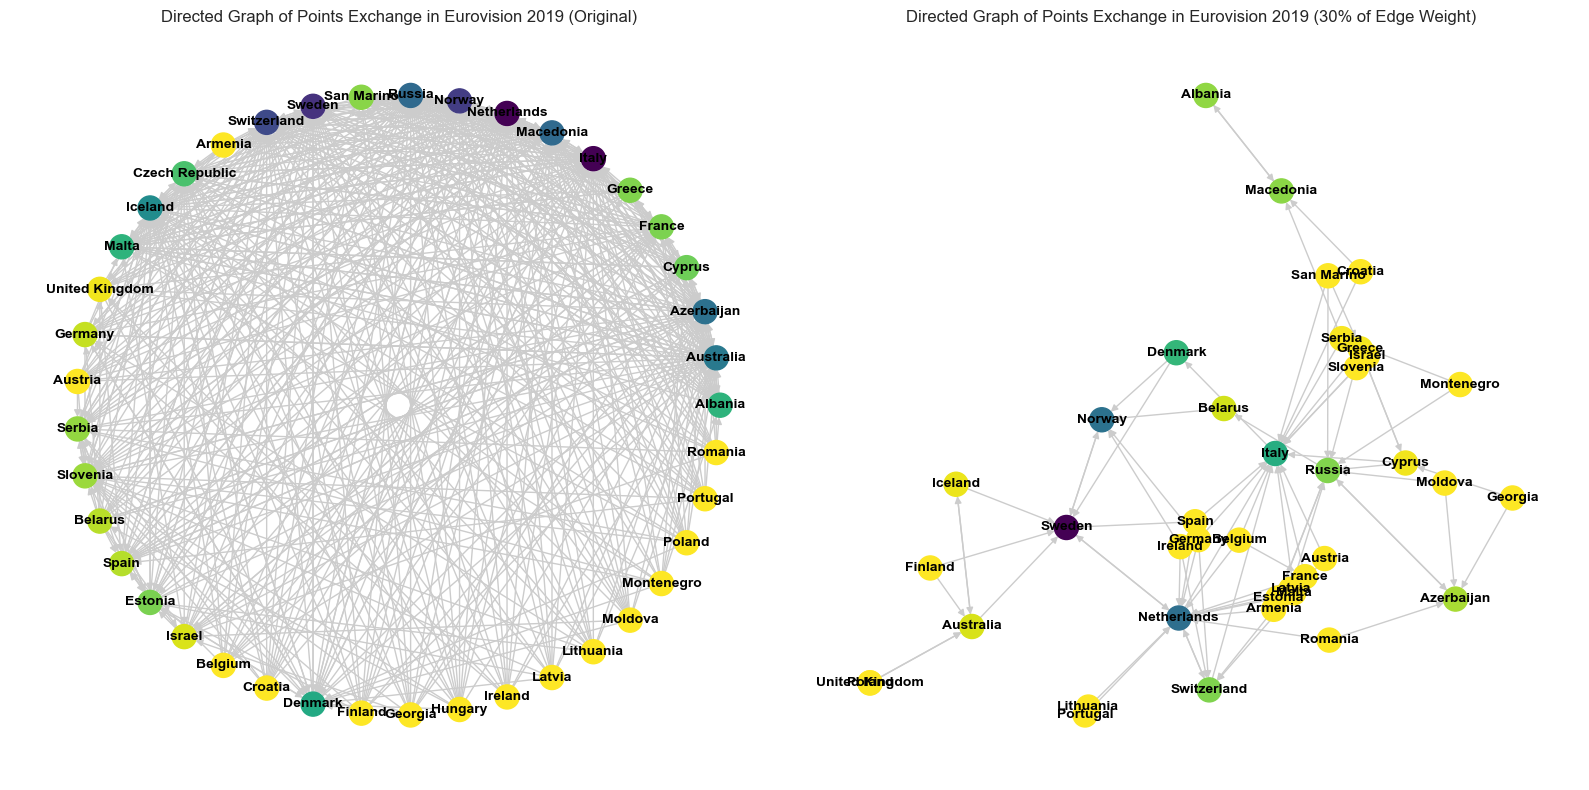

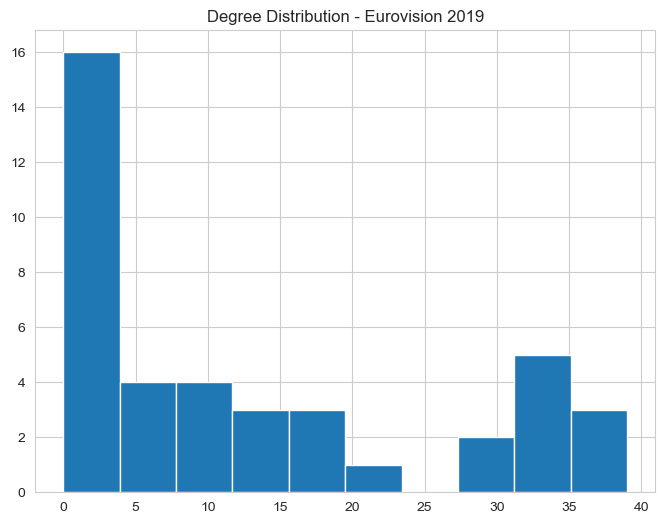

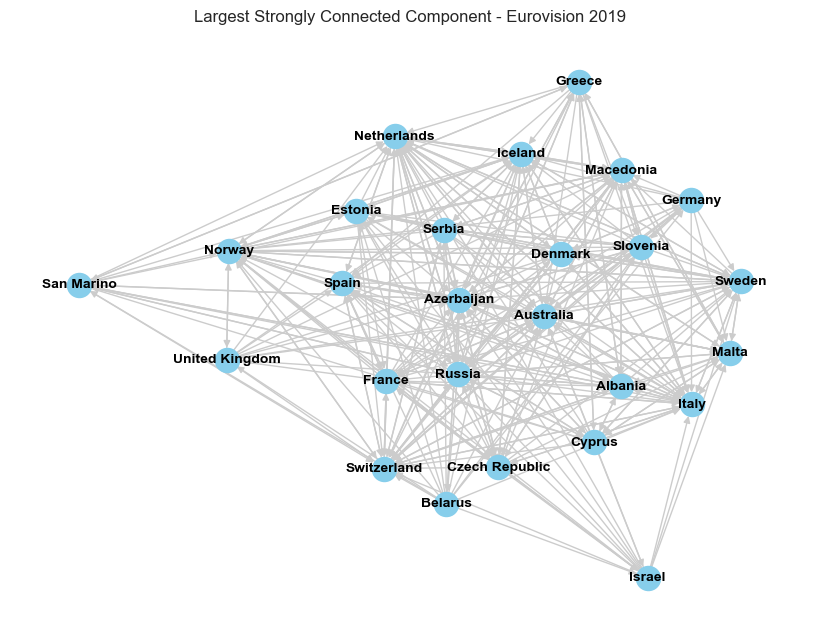

{'nodos': 41,
 'enlaces': 536,
 'denisdad': 0.32682926829268294,
 'grado entrada': InDegreeView({'Albania': 11, 'Australia': 35, 'Azerbaijan': 35, 'Cyprus': 11, 'France': 19, 'Greece': 7, 'Italy': 36, 'Macedonia': 31, 'Netherlands': 39, 'Norway': 35, 'Russia': 35, 'San Marino': 11, 'Sweden': 31, 'Switzerland': 38, 'Armenia': 0, 'Czech Republic': 22, 'Iceland': 33, 'Malta': 15, 'United Kingdom': 5, 'Germany': 6, 'Austria': 0, 'Serbia': 12, 'Slovenia': 19, 'Belarus': 3, 'Spain': 12, 'Estonia': 11, 'Israel': 7, 'Belgium': 0, 'Croatia': 0, 'Denmark': 17, 'Finland': 0, 'Georgia': 0, 'Hungary': 0, 'Ireland': 0, 'Latvia': 0, 'Lithuania': 0, 'Moldova': 0, 'Montenegro': 0, 'Poland': 0, 'Portugal': 0, 'Romania': 0}),
 'page_rank': ({'Albania': 0.0319253386225071,
   'Australia': 0.051529839404953835,
   'Azerbaijan': 0.054250343666662766,
   'Cyprus': 0.021268269246749325,
   'France': 0.01958388297276664,
   'Greece': 0.018964203473161793,
   'Italy': 0.08389407273625639,
   'Macedonia': 0.0565

In [156]:
# Metricas de la red para el año 2019
metricas_2019 = metricas_red(df2, 2019)
metricas_2019

* La red tiene $n=41$ nodos (número de países que participaron) y $m=536$ enlaces 

* El grado que se toma en cuenta es el grado de entrada, dado que el ganador se determina según qué país ha recibido más votos. Por lo tanto, el país con el mayor grado de entrada es Netherlands, con un grado de 39. En cuanto a la distribución de grado, se observa que hay muchos nodos con un grado bajo, pero se aprecia un incremento notable para valores más altos del grado. Este patrón coincide con los países que han ocupado posiciones destacadas en la competencia.

* La densidad de la red es $\rho = \frac{m}{\binom{N}{2}} = 0.3268$. Se trata de una medida de la cantidad de conexiones presentens en relaicón con la mantidad máxima posible. En este caso, vemos que la densidad es menor, dado que la red no está completamente conectada.

* El *page rank* mide la importancia relativa de un nodo en una red dirigida, teniendo en cuenta la estructura de enlaces entrantes y salientes en la red. En este caso, el país con mayor Page Rank es nuevamente Holanda con un valor de $ 0.08386376958658438$.

* Aunque la red no está completamente conectada, el diámetro de su componente gigante es de $3$. Además, presenta un coeficiente de clustering de $0.58$ y una longitud media de camino de $1.48$. Esto indica que la red exhibe la propiedad de "mundo pequeño", lo que significa que la mayoría de los nodos pueden alcanzarse desde cualquier otro nodo en solo unos pocos pasos.

* Centralidad de intermediación: Una medida de la importancia de un nodo en la red, calculada en función de la cantidad de caminos más cortos que pasan a través de ese nodo. En este caso, el país con mayor centralidad de intermediación es Azerbayan. Esto puede indicar que posee una mayor neutraldiad en el concurso. Ver Figura 1.

* Centraldiad de cercanía: Evalúa la importancia de un nodo en una red, basada en la inversa de la suma de las distancias más cortas entre ese nodo y todos los demás nodos de la red. En este contexto, Holanda destaca nuevamente como el país con la mayor centralidad de cercanía. Este resultado es comprensible, ya que al ser la ganadora de la edición, es probable que muchos países hayan emitido votos hacia Holanda, lo que facilitaría su conexión con otros nodos en la red.

* Transitividad: Se refiere a la proporción de triángulos cerrados en la red, lo que indica en qué medida los nodos tienden a formar grupos o comunidades. En este caso, observamos una alta transitividad de $0.71$, lo que sugiere que hay muchos patrones de 3 nodos que votan entre sí. Este aspecto será analizado con mayor detalle en el estudio de comunidades.

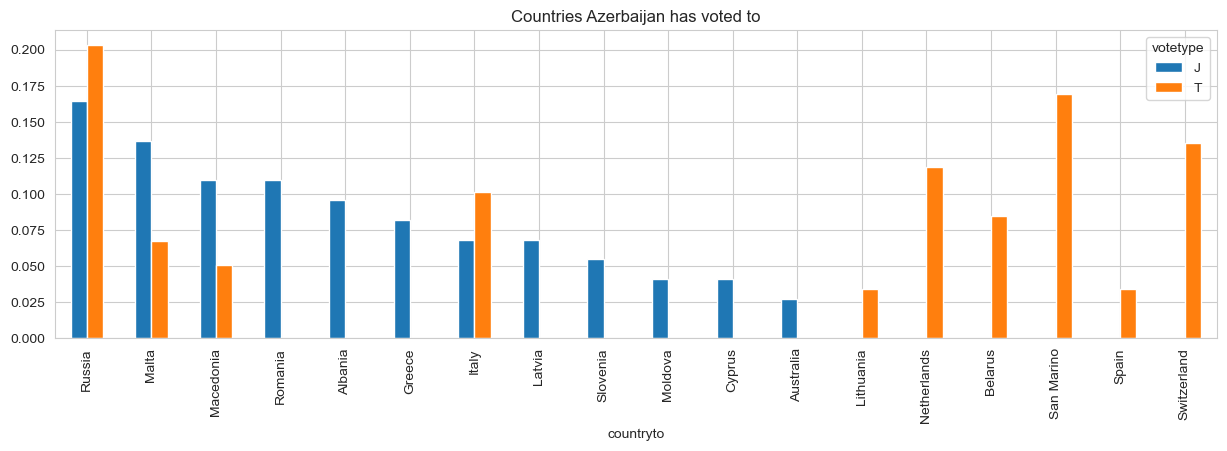

In [134]:
# Centralidad de intermediacion - Votaciones Azerbaijan
df2 \
    .query('year == 2019 and countryfrom=="Azerbaijan"')\
    .pivot_table(index='countryto',columns='votetype', values='points',aggfunc='sum').fillna(0).sort_values('J',ascending=False)\
    .apply(lambda x: x/x.sum(), axis=0)\
    .plot(kind='bar',stacked=False,figsize=(15,4), title='Countries Azerbaijan has voted to');
plt.grid('off')
plt.show();

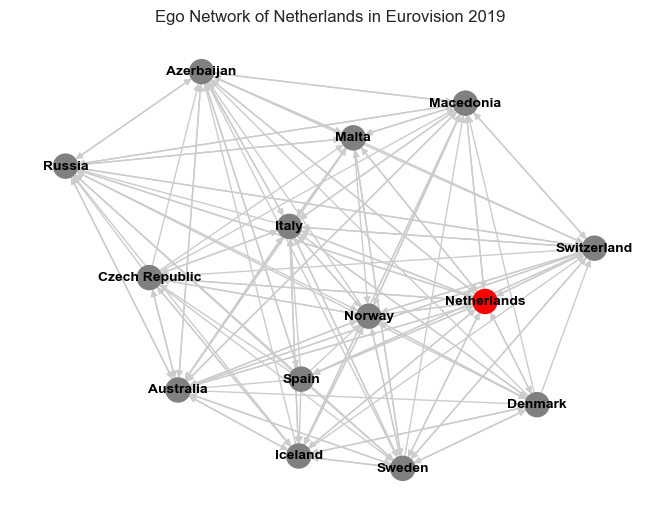

In [154]:
# Red Ego de Holanda
ego_network = G_19.subgraph(nx.ego_graph(G_19, 'Netherlands'))
pos_ego = nx.spring_layout(ego_network) 

# Crear diccionario de colores
node_colors = ['red' if node == 'Netherlands' else 'gray' for node in ego_network.nodes()]

nx.draw(ego_network, pos_ego, with_labels=True, node_color=node_colors,
        edge_color='#cccccc', font_color='#000', font_size=10, font_weight='bold', arrows=True)
plt.title('Ego Network of Netherlands in Eurovision 2019')
plt.axis('off')
plt.show()

**Comparación con modelos de referencia**

In [157]:
# Modelo de Erdős-Rényi (ER)
def generar_red_ER(n, p):
    return nx.erdos_renyi_graph(n, p)

# Modelo de Barabási-Albert (BA)
def generar_red_BA(n, m):
    return nx.barabasi_albert_graph(n, m)

# Función para calcular metricas de red
def calcular_metricas_red(G):
    metrics = {}

    # Calcular las métricas de interés
    metrics['nodos'] = len(G.nodes())
    metrics['enlaces'] = len(G.edges())
    metrics['grado_promedio'] = sum(dict(G.degree()).values()) / metrics['nodos']
    # Agrega más métricas según tus necesidades

    return metrics

In [158]:
# Generar redes de referencia utilizando los modelos ER y BA
red_ER = generar_red_ER(41, 2*536/(41*(41-1)))
red_BA = generar_red_BA(41,round(2*536/41))

In [159]:
# Calcular metricas para cada red
metricas_ER = calcular_metricas_red(red_ER)
metricas_BA = calcular_metricas_red(red_BA)

# Imprimir las métricas
print("\nMétricas del modelo ER:")
print(metricas_ER)
print("\nMétricas del modelo BA:")
print(metricas_BA)


Métricas del modelo ER:
{'nodos': 41, 'enlaces': 547, 'grado_promedio': 26.682926829268293}

Métricas del modelo BA:
{'nodos': 41, 'enlaces': 390, 'grado_promedio': 19.024390243902438}


### 4.2. Análisis de comunidades <a name="analisis-de-comunidades"></a>

Detectar comunidades en una red es fundamental para comprender su estructura y dinámica. El objetivo es separar la res en grupos disjuntos tales que los enlaces que los unan sean menos que los esperados.

**Label Propagation (Propagación de Etiquetas):**
1. *Apuntes*: Se contruyen redes aleatorias con el mismo número de nodos y elaces que la red a estudiar. Se cuenta el número de patrones en las redes. Se calcula el valor de Z para determinar si el número de patrones es significativo.
* Asigna etiquetas aleatorias a los nodos.
* Elige la etiqueta más común en el vecindario de cada nodo.
* Este método tiende a agrupar nodos en comunidades grandes.
* Es muy rápido pero no es la mejor opción para grafos altamente densos.

**Louvain Modularity (Modularidad de Louvain):**
* Asigna nodos a clústeres de manera exhaustiva para maximizar la cantidad de enlaces dentro de cada clúster.
* Produce buenos clústeres y es muy eficiente.
* Es útil para grafos de tamaño mediano a grande.

**Spectral (Espectral):**
* Realiza un Kmeans de la incrustación espectral (vectores y valores propios) de la matriz de Laplacian.
* Está relacionado con los cortes de grafo y es efectivo para detectar comunidades bien definidas.
* Puede ser más costoso computacionalmente que otros métodos, pero puede proporcionar resultados precisos.

### 1. PATRONES (MOTIFS)

In [ ]:
# FINAL 2019
df_19, edges_19, G_19, Gedges_19 = plot_eurovision_graph(df2, 2019, percent=0.3)  

Detección de patrones de 3 nodos

1. **Identificar triangulos:** Puedes usar la función `nx.triangles(G)` de NetworkX para calcular el número de triángulos que cada nodo forma en una red G. Esto te dará un diccionario donde las claves son los nodos y los valores son el número de triángulos en los que participa cada nodo.

In [ ]:
# Calcular el numero de triangulos para cada nodo
nx.triangles(G_19.to_undirected()) # Convertir el grafo dirigido en uno no dirigido

2. **Identificar triángulos globales:** Para contar el número total de triángulos en una red, puedes usar la función `nx.triadic_census(G)`, que devuelve un diccionario que cuenta los diferentes tipos de triángulos en la red.

In [ ]:
nColumns=8;
fig, axs = plt.subplots(int(np.ceil(len(nx.algorithms.triads.TRIAD_NAMES)/nColumns)), nColumns, figsize=(12,4))

for i,k in enumerate(list(nx.algorithms.triads.TRIAD_NAMES)):
    ax = axs[i//nColumns, i%nColumns]
    ax.set_title(f'{k}');
    nx.draw(nx.triad_graph(k), pos={'a':[0,0],'c':[10,0],'b':[5,10*np.sqrt(3)/2]},
            node_size=200, font_size=15,font_color='white', with_labels=True,ax=ax);

ax.set_facecolor('#cccccc');
plt.tight_layout();

In [ ]:
nx.triadic_census(G_19) # En la red total

In [ ]:
nx.triadic_census(Gedges_19) # en la red con el porcentaje seleccionado

**Kaggle**

In [ ]:
def createTriac(df,topN, funcTop=selectTopN):
    temp = df.groupby(['countryfrom','countryto']).agg({'points':'sum'})\
    .reset_index().rename(columns={'points':'weight'})\
    .groupby(['countryfrom']).apply(funcTop,'weight',topN).reset_index(drop=True)

    g = nx.from_pandas_edgelist(temp,'countryfrom','countryto',['weight'], create_using=nx.DiGraph)
    return nx.triadic_census(g);

In [ ]:
#selecting only relevant votes from most points to less point as connections
display(HTML("How chosing top N most voted countries as edges can affect the network"));
triads = pd.DataFrame([
    {'triad':c[0], 'count':c[1], 'topn':n}
    for n in [1,2,3,4,5,7,10,15,20,25,30,35,41,45]
    for c in createTriac(df2, n).items()
]).pivot_table(index='triad',columns='topn', values='count')
triads.reindex(index=list(nx.algorithms.triads.TRIAD_NAMES)).style.background_gradient()

In [ ]:
display(HTML("How chosing top N percent of votes countries as edges can affect the network"))
triads = pd.DataFrame([
    {'triad':c[0], 'count':c[1], 'percent':int(n*100)}
    for n in np.linspace(0,1,21)
    for c in createTriac(df2, n, selectTopPercent).items()
]).pivot_table(index='triad',columns='percent', values='count')
triads.reindex(index=list(nx.algorithms.triads.TRIAD_NAMES)).style.background_gradient()

### 2. Label Propagation (Propagación de Etiquetas)
* Asigna etiquetas aleatorias a los nodos.
* Elige la etiqueta más común en el vecindario de cada nodo.
* Este método tiende a agrupar nodos en comunidades grandes.
* Es muy rápido pero no es la mejor opción para grafos altamente densos.

In [ ]:
plot_eurovision_graph(df2, 2019, percent=0.3)  

In [ ]:
# Paquetes y librerias
import random
from collections import Counter

**Nota Sofía:** Idea de los apuntes. Contar los patrones de una red aleatoria con el mismo número de nodos y enlaces y comparar

In [ ]:
# Contamos el numero de patrones 3 motif
patrones_red = nx.triadic_census(Gedges_19) # en la red con el porcentaje seleccionado

def calcular_z_valor(patrones_red, num_redes):
    # Lista para almacenar los resultados de cada patron
    resultados_por_patron = {}
    
    # Generar redes aleatorias y contar patrones para cada una
    for _ in range(num_redes):
        red_aleatoria = nx.gnm_random_graph(Gedges_19.number_of_nodes(), Gedges_19.number_of_edges(), directed=True)
        patrones_red_aleatoria = nx.triadic_census(red_aleatoria)
        
        # Almacear para cada patron
        for patron, num_patrones in patrones_red_aleatoria.items():
            if patron not in resultados_por_patron:
                resultados_por_patron[patron] = []
            resultados_por_patron[patron].append(num_patrones)
            
    # Media y sd.
    media = {clave: [] for clave in resultados_por_patron.keys()}
    st = {clave: [] for clave in resultados_por_patron.keys()}
    
    for patron, result in resultados_por_patron.items():
        media[patron] = np.mean(result)
        st[patron] = np.std(result)
        
    # Valor Z
    valores_Z = {clave: [] for clave in patrones_red.keys()}
    for patron, num_patrones in patrones_red.items():
        if st[patron] != 0:
            val = (num_patrones - media[patron])/st[patron]
        else:
            val = float('inf')
            
        valores_Z[patron] = val
        
    return valores_Z

In [ ]:
calcular_z_valor(patrones_red, 100)

In [ ]:
def label_propagation(graph):
    # Inicializar las etiquetas de los nodos con identificadores únicos
    for node in graph.nodes():
        graph.nodes[node]['label'] = node
    
    while True:
        # Mezclar los nodos para que el orden de actualización sea aleatorio
        nodes = list(graph.nodes())
        random.shuffle(nodes)
        
        # Actualizar las etiquetas de los nodos
        for node in nodes:
            # Obtener las etiquetas de los vecinos del nodo
            neighbor_labels = [graph.nodes[neighbor]['label'] for neighbor in graph.neighbors(node)]
            
            # Contar las apariciones de cada etiqueta
            label_counts = Counter(neighbor_labels)
            
            # Elegir la etiqueta más común
            most_common_label = label_counts.most_common(1)[0][0]
            
            # Actualizar la etiqueta del nodo
            graph.nodes[node]['label'] = most_common_label
        
        # Verificar si todas las etiquetas permanecen iguales
        if all(graph.nodes[node]['label'] == graph.nodes[list(graph.neighbors(node))[0]]['label'] for node in graph.nodes()):
            break
    
    # Devolver un diccionario con los nodos y sus etiquetas
    return {node: graph.nodes[node]['label'] for node in graph.nodes()}

In [ ]:
# Propagación de etiquetas
labels = label_propagation(Gedges_19)
print(labels)

## 3. Louvain Modularity (Modularidad de Louvain)
* Asigna nodos a clústeres de manera exhaustiva para maximizar la cantidad de enlaces dentro de cada clúster.
* Produce buenos clústeres y es muy eficiente.
* Es útil para grafos de tamaño mediano a grande.

In [ ]:
# Paquetes y librerias
from networkx.algorithms import community

In [ ]:
def louvain_modularity(graph):
    # Ejecutar el algoritmo de Louvain Modularity
    communities_generator = community.greedy_modularity_communities(graph)
    
    # Convertir el resultado en una lista de clústeres
    communities = [list(community) for community in communities_generator]
    
    return communities

In [ ]:
# Louvain Modularidad
result = louvain_modularity(Gedges_19)
print(result)

## 4. Spectral (Espectral)
* Realiza un Kmeans de la incrustación espectral (vectores y valores propios) de la matriz de Laplacian.
* Está relacionado con los cortes de grafo y es efectivo para detectar comunidades bien definidas.
* Puede ser más costoso computacionalmente que otros métodos, pero puede proporcionar resultados precisos.

In [ ]:
# Paquetes y librerias
from sklearn.cluster import KMeans

In [ ]:
def spectral_clustering(graph, num_clusters):
    # Obtener la matriz de Laplacian del grafo
    laplacian_matrix = nx.laplacian_matrix(graph)
    
    # Calcular los vectores y valores propios de la matriz de Laplacian
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix.toarray())
    
    # Seleccionar los vectores propios correspondientes a los k valores propios más pequeños
    k_smallest_indices = np.argsort(eigenvalues)[:num_clusters]
    selected_eigenvectors = eigenvectors[:, k_smallest_indices]
    
    # Ejecutar KMeans en los vectores propios seleccionados
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(selected_eigenvectors)
    
    # Asignar nodos a los clústeres detectados por KMeans
    clusters = {}
    for node, label in zip(graph.nodes(), kmeans.labels_):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(node)
    
    return list(clusters.values())

In [ ]:
result = spectral_clustering(Gedges_19.to_undirected(), 3)
print(result)

### 4. 3. Evolución y dinámica <a name="evolucion-y-dinamica"></a>

## 5. Conclusiones <a name="conclusiones"></a>

## Bibliografía <a name="bibliografia"></a>